In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
%matplotlib inline
import os

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.cluster import OPTICS

In [2]:
data_df = pd.read_csv("../input/tabular-playground-series-jul-2022/data.csv")


In [3]:
data_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [5]:
data_df.isna().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [6]:
# Drop the 'id' column from the DataFrame
Id = data_df['id']
data_df = data_df.drop(columns=['id'])  
data_df.columns

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28'],
      dtype='object')

In [7]:
#standardize the data:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)

#perform PCA on the standardized data for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

> k-means clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

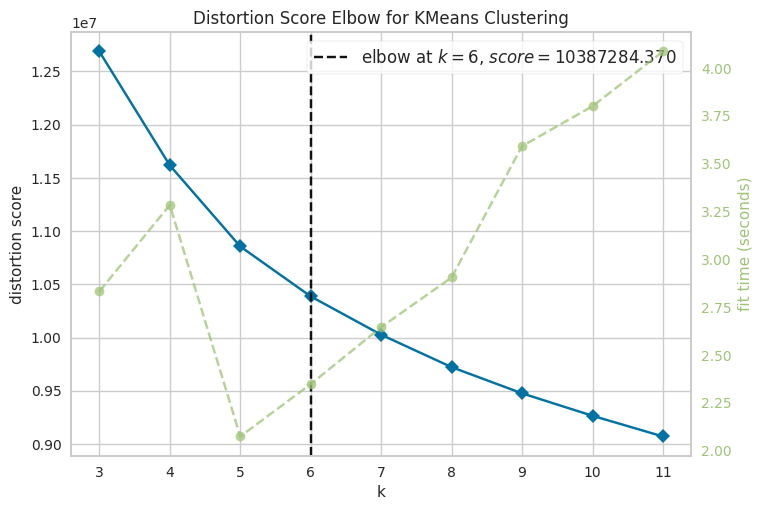

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#TO ESTIMATE THE BEST K, USING THE ELBOW METHOD:
visualizer = KElbowVisualizer( KMeans(),n_init=10, k=(3,12))

visualizer.fit(data_df)
visualizer.show()

In [9]:
#fitting the model
model = KMeans(n_clusters=5,n_init=20 ,random_state=42)
model.fit(data_scaled)
y_kmeans = model.predict(data_scaled)

#computing the silhouette score
score = metrics.silhouette_score(data_scaled, y_kmeans)
print("When the number of clusters =", 5, "Silhouette Score:", score)


When the number of clusters = 5 Silhouette Score: 0.03651339397319201


In [10]:
# Get unique cluster labels and their counts
unique_clusters, cluster_counts = np.unique(y_kmeans, return_counts=True)

# Print unique cluster labels and their counts
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 15486 data points
Cluster 1: 19188 data points
Cluster 2: 20922 data points
Cluster 3: 20851 data points
Cluster 4: 21553 data points


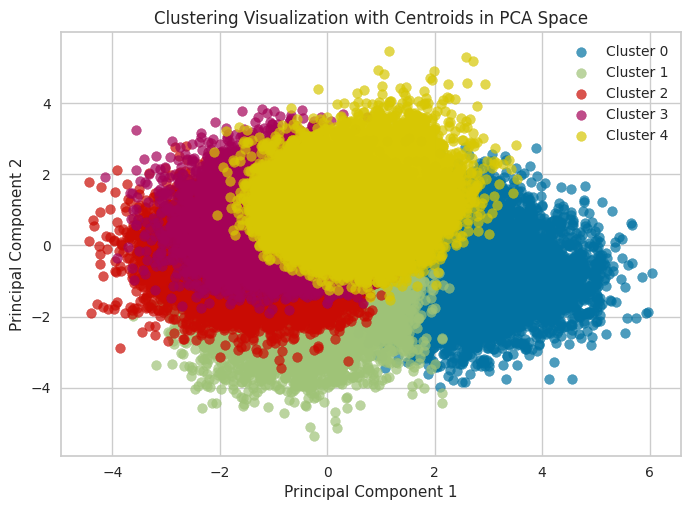

In [11]:
# Scatter plot for the clusters in PCA space
for cluster_label in set(y_kmeans):
    cluster_mask = y_kmeans == cluster_label
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization with Centroids in PCA Space')
plt.legend()
plt.show()

In [12]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(y_kmeans)), 'Predicted': y_kmeans})

# Specify the directory on Kaggle where you want to save the file
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'KMeans.csv')
submission_df.to_csv(submission_file, index=False)


kmeans with columns transformation technique

          id  cluster_label
0          0              0
1          1              3
2          2              0
3          3              4
4          4              3
...      ...            ...
97995  97995              3
97996  97996              3
97997  97997              2
97998  97998              4
97999  97999              0

[98000 rows x 2 columns]


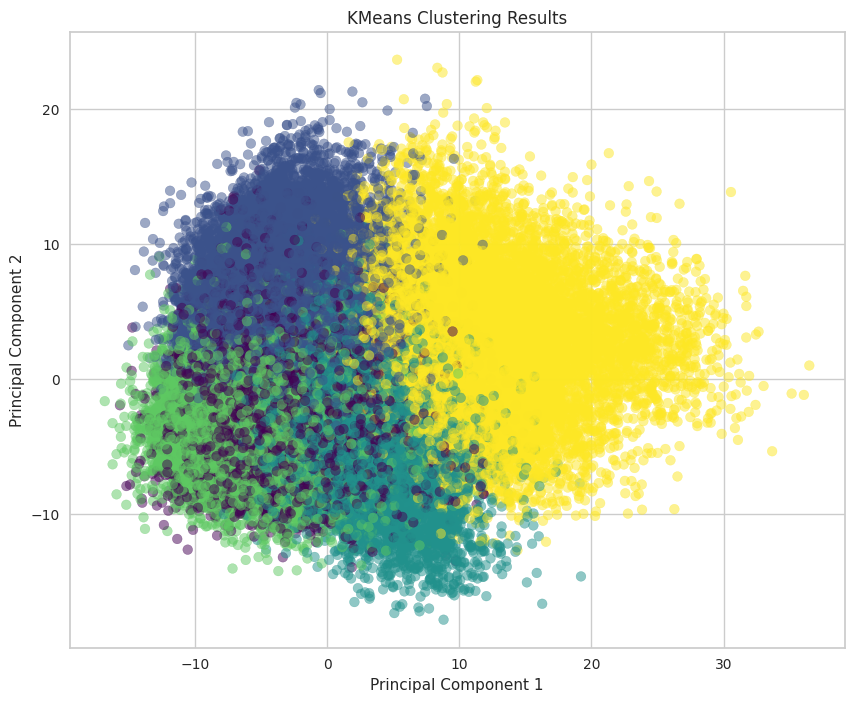

In [13]:
# Separate columns based on data types
integer_columns = data_df.select_dtypes(include='int64').columns
float_columns = data_df.select_dtypes(include='float64').columns

# Create a preprocessor with separate transformers for integer and float columns
preprocessor = ColumnTransformer(
    transformers=[
        ('int', StandardScaler(), integer_columns),
        ('float', StandardScaler(), float_columns)
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

# Combine preprocessing with clustering in a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clustering', KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init='auto', random_state=20, algorithm='lloyd')) 
])

# Fit the pipeline to the data
pipeline.fit(data_df)

# Get cluster labels
cluster_labels = pipeline.predict(data_df)

# Combine the 'id' column and cluster labels into a DataFrame
result_df = pd.DataFrame({'id': Id, 'cluster_label': cluster_labels})

# Print the resulting DataFrame
print(result_df)

# Visualize clustering using the first two PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_df)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Save the DataFrame with 'id' and 'cluster_label' columns to a CSV file
submission_df = pd.DataFrame({'id': result_df['id'], 'Predicted': result_df['cluster_label']})
submission_df.to_csv('/kaggle/working/submission_kmeans.csv', index=False)


K-MEANS++

In [14]:
#Fit KMeans model for better initialization (k-means++)
model = KMeans(n_clusters=5, init='k-means++', random_state=21)
model.fit(data_scaled)
y_kmeans_plus_plus= model.predict(data_scaled)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Get unique cluster labels and their counts
unique_clusters, cluster_counts = np.unique(y_kmeans_plus_plus, return_counts=True)

# Print unique cluster labels and their counts
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")
    
#computing the silhouette score
score = metrics.silhouette_score(data_scaled, y_kmeans_plus_plus)
print( "Silhouette Score:", score)


Cluster 0: 20946 data points
Cluster 1: 20807 data points
Cluster 2: 15477 data points
Cluster 3: 19182 data points
Cluster 4: 21588 data points
Silhouette Score: 0.036508580873947934


NameError: name 'centroids_pca' is not defined

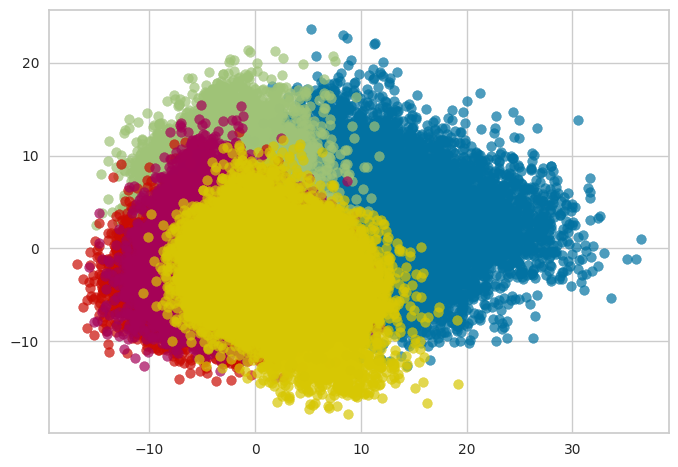

In [16]:
# Scatter plot for the clusters in PCA space
for cluster_label in set(y_kmeans):
    cluster_mask = y_kmeans == cluster_label
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], label=f'Cluster {cluster_label}', alpha=0.7)


# Plot multiple centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, color='red', label='Centroids', alpha=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization with Centroids in PCA Space')
plt.legend()
plt.show()


In [ ]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(y_kmeans_plus_plus)), 'Predicted': y_kmeans_plus_plus})

# Specify the directory on Kaggle to save the file
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'KMeansPLUSPLUS.csv')
submission_df.to_csv(submission_file, index=False)

DBSCAN 

In [ ]:
dbscan = DBSCAN(eps=6, min_samples=100, metric='euclidean', algorithm='auto', leaf_size=30, p=1, n_jobs=-1)
labels = dbscan.fit_predict(data_scaled)

#unique cluster labels and their counts
unique_clusters, cluster_counts = np.unique(labels, return_counts=True)

for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

#computing the silhouette score
score = metrics.silhouette_score(data_scaled, labels)
print("Silhouette Score:", score)


In [ ]:
# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(labels)), 'Predicted': labels})

# Specify the directory on Kaggle working area
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on K aggle
submission_file = os.path.join(kaggle_save_directory, 'DBSCAN.csv')
submission_df.to_csv(submission_file, index=False)

Agglomerative clustering (Hierarchical) 

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='complete', metric='euclidean',affinity='deprecated')
labels_agg = agg_clustering.fit_predict(data_scaled)

In [ ]:
# Get unique cluster labels and their counts
unique_clusters_agg, cluster_counts_agg = np.unique(labels_agg, return_counts=True)

# Print unique cluster labels and their counts
for cluster, count in zip(unique_clusters_agg, cluster_counts_agg):
    print(f"Cluster {cluster}: {count} data points")


#computing the silhouette score
score = metrics.silhouette_score(data_scaled, cluster_labels)
print("Silhouette Score:", score)


In [ ]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_agg, cmap='viridis', edgecolor='k', s=50)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Plot dendrogram
linkage_matrix = linkage(data_scaled, 'complete')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(labels_agg)), 'Predicted': labels_agg})

# Specify the directory on Kaggle 
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'AGG.csv')
submission_df.to_csv(submission_file, index=False)

Gaussian Mixture clustering

In [ ]:
gm = GaussianMixture(
    n_components=7,
    random_state=42,
    covariance_type='full',
    max_iter=100,
    n_init=3,
    init_params='kmeans', 
)
labels = gm.fit_predict(data_scaled)

# Print unique cluster labels and their counts
unique_clusters, cluster_counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

#computing the silhouette score
score = metrics.silhouette_score(data_scaled, labels)
print("Silhouette Score:", score)

In [ ]:
# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Gaussian Mixture Model Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(labels)), 'Predicted': labels})

# Specify the directory on Kaggle 
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'GM.csv')
submission_df.to_csv(submission_file, index=False)

Bayesian Gaussian Mixture Model


In [ ]:
model_bgm=BayesianGaussianMixture(n_components=5, covariance_type='full', max_iter=300, n_init=4, init_params='kmeans', random_state=10,)
model_bgm.fit(data_scaled)


In [ ]:
# Get cluster labels
cluster_labels_bgm = model_bgm.predict(data_scaled)

# Print unique cluster labels and their counts
unique_labels_bgm, counts_bgm = np.unique(cluster_labels_bgm, return_counts=True)
for label, count in zip(unique_labels_bgm, counts_bgm):
    print(f'Cluster {label}: {count} points')
#computing the silhouette score
score = metrics.silhouette_score(data_scaled, cluster_labels_bgm)
print("Silhouette Score:", score)



# Plot the Bayesian Gaussian Mixture clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_bgm, cmap='viridis', edgecolors='k', s=50)
plt.title('Bayesian Gaussian Mixture Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(cluster_labels_bgm)), 'Predicted': cluster_labels_bgm})

# Specify the directory on Kaggle 
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'BGM.csv')
submission_df.to_csv(submission_file, index=False)

OPTICS ALGORITHM

In [ ]:
# Perform OPTICS clustering
optics_model = OPTICS(
    min_samples=5,
    xi=0.05,
    min_cluster_size=0.05,
    max_eps=np.inf,
    metric='minkowski',
    p=2,
    leaf_size=30
)
cluster_labels = optics_model.fit_predict(data_scaled)

In [ ]:
# Print unique cluster labels and their counts
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f'Cluster {label}: {count} points')

# Calculate silhouette score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"\nSilhouette Score: {silhouette_avg}")

# Plot the clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('OPTICS Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(cluster_labels)), 'Predicted': cluster_labels})

# Specify the directory on Kaggle 
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'opt.csv')
submission_df.to_csv(submission_file, index=False)